In [2]:
# =============================================================
# VISUALIZACIÓN DEL ÁRBOL BINARIO DE BÚSQUEDA (BST) DE PRODUCTOS
# =============================================================
# Este notebook muestra gráficamente la estructura del árbol BST
# que almacena los productos de la tienda online.

# Importar librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
import mysql.connector

# Cargar variables de entorno
load_dotenv()

# Importar clases del proyecto
from bst import Producto, ArbolProductosBST, NodoBST

## 1. Cargar Productos desde la Base de Datos

Conectamos a MySQL y cargamos todos los productos en el árbol BST.

In [10]:
# Crear instancia del árbol BST
arbol_productos = ArbolProductosBST()

# Conectar a la base de datos MySQL
mydb = mysql.connector.connect(
    host=os.getenv("DB_HOST"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    database=os.getenv("DB_NAME")
)

cursor = mydb.cursor(dictionary=True)

# Obtener todos los productos
cursor.execute("SELECT * FROM productos ORDER BY producto_id")
productos = cursor.fetchall()

print(f" Se encontraron {len(productos)} productos en la base de datos:\n")

# Insertar cada producto en el árbol BST
for prod in productos:
    producto = Producto(
        product_id=prod["producto_id"],
        nombre=prod["nombre"],
        precio=float(prod["precio"]),
        descripcion=prod["descripcion"],
        stock=prod["stock"]
    )
    arbol_productos.insertar(producto)
    print(f"  ID: {prod['producto_id']:3} | {prod['nombre'][:30]:30} | ${float(prod['precio']):>10.2f}")

cursor.close()
mydb.close()

print(f"\n Productos insertados en el árbol BST correctamente")

 Se encontraron 3 productos en la base de datos:

  ID:   1 | Teclado Mecanico               | $   1685.45
  ID:   2 | Mouse                          | $    700.00
  ID:   3 | CPU                            | $   1850.00

 Productos insertados en el árbol BST correctamente


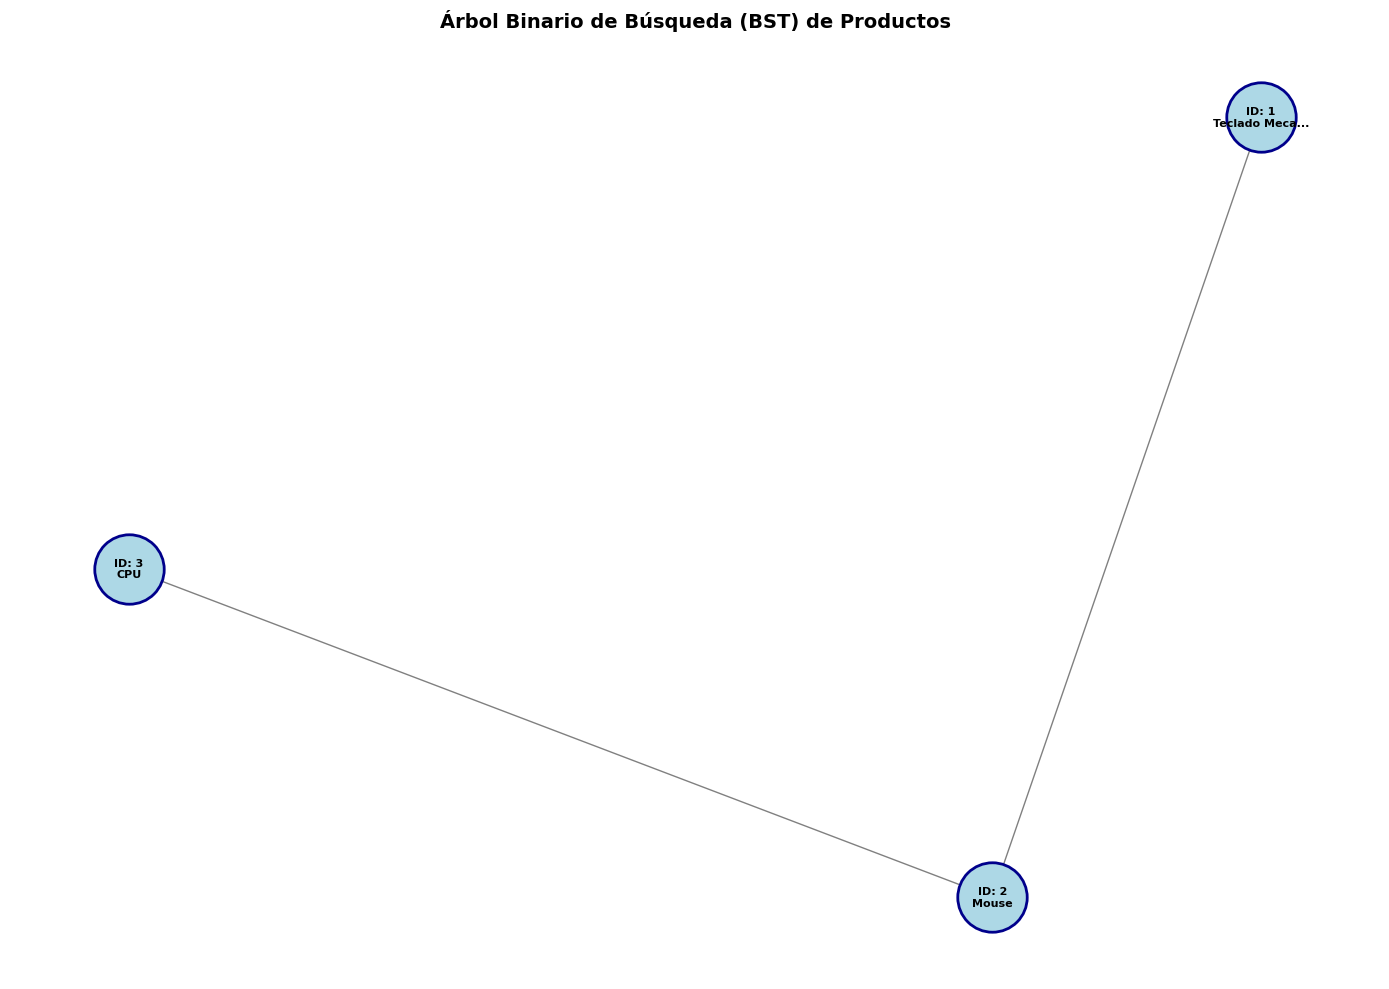

In [16]:
# Visualizar el árbol BST utilizando NetworkX y Matplotlib

def agregar_nodos_arbol(grafo, nodo, info_nodos):
    """Agrega nodos y aristas al grafo recorriendo el árbol BST"""
    if nodo is not None:
        # Guardar información del nodo
        grafo.add_node(nodo.producto.product_id)
        info_nodos[nodo.producto.product_id] = {
            'nombre': nodo.producto.nombre,
            'precio': nodo.producto.precio
        }
        
        if nodo.izquierda is not None:
            grafo.add_edge(nodo.producto.product_id, nodo.izquierda.producto.product_id)
            agregar_nodos_arbol(grafo, nodo.izquierda, info_nodos)
        if nodo.derecha is not None:
            grafo.add_edge(nodo.producto.product_id, nodo.derecha.producto.product_id)
            agregar_nodos_arbol(grafo, nodo.derecha, info_nodos)

# Crear el grafo dirigido
grafo_bst = nx.DiGraph()
info_nodos = {}
agregar_nodos_arbol(grafo_bst, arbol_productos.raiz, info_nodos)

# Usar layout de spring para posicionar los nodos
posiciones = nx.spring_layout(grafo_bst, k=2, iterations=50)

plt.figure(figsize=(14, 10))

# Dibujar los nodos (círculos) sin etiquetas
nx.draw_networkx_nodes(grafo_bst, posiciones, node_size=2500, node_color="lightblue", edgecolors="darkblue", linewidths=2)

# Dibujar las aristas (líneas)
nx.draw_networkx_edges(grafo_bst, posiciones, arrows=True, arrowsize=20, edge_color="gray")

# Crear etiquetas combinadas: "ID\nNombre"
etiquetas_combinadas = {}
for node_id in grafo_bst.nodes():
    nombre = info_nodos[node_id]['nombre']
    # Truncar nombre si es muy largo
    nombre_corto = nombre[:12] + "..." if len(nombre) > 12 else nombre
    etiquetas_combinadas[node_id] = f"ID: {node_id}\n{nombre_corto}"

# Dibujar las etiquetas dentro de los nodos
nx.draw_networkx_labels(grafo_bst, posiciones, labels=etiquetas_combinadas, 
                        font_size=8, font_weight='bold')

plt.title("Árbol Binario de Búsqueda (BST) de Productos", fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()